In [ ]:
!pip install pingouin

     |████████████████████████████████| 183 kB 14.1 MB/s 
     |████████████████████████████████| 38.1 MB 374 kB/s 
     |████████████████████████████████| 9.8 MB 54.9 MB/s 
  Created wheel for pingouin: filename=pingouin-0.5.1-py3-none-any.whl size=194002 sha256=51b7821141f3ebbd2beff0946053dd5df5da19c4804c50d808eb5056ed50b01d
  Stored in directory: /root/.cache/pip/wheels/74/a7/b6/5b5f03b0395fdada1f45d3aed76e7da48873a02805545ef652
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=b9e9f9df1ba15c7cc2c21073c59082f1fa91a1d03556f08b5067b3f54a725b6c
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling stats

In [ ]:
exit() #!!!

**exit()** - это перезапустит среду выполнения без удаления файлов **и pingouin пойдет**. Время выполнения начнется автоматически. И если вы нажмете «Run all», запуск не прерывается и работает до конца.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

import os
import numpy as np
import pandas as pd
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
import pingouin as pg

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# **ЗАДАНИЕ 7. ЛИНЕЙНЫЕ МОДЕЛИ ДЛЯ КЛАССИФИКАЦИИ**

Постройте линейные модели для классификации (логистическая регрессия, линейный метод опорных векторов, линейный дискриминантный анализ), оцените их качество, дайте прогноз класса для нового наблюдения.
Постарайтесь максимально автоматизировать все вычисления, использовать существующие модули среды программирования Python.

# **Методика выполнения задания:**

# **Раздел 1. Логистическая регрессия (функция)(в основном для 2-х классов) используется**

**1. Укажите путь к рабочей папке, где хранятся данные, с помощью функции chdir() из модуля os.**

**2. Загрузите данные файла pima-indians-diabetes.data.csv с помощью функции read_csv() из модуля pandas. Названия столбцов укажите следующими: names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']. Посмотрите на первые 5 наблюдений с помощью функции head().**

**3. Сохраните в переменную array значения признаков, обратившись к атрибуту values.**

**4. Выделите в переменной array часть, которая относится к факторным признакам, назовите ее X, и часть, которая относится к результативному признаку, - Y. Прокомментируйте содержимое переменных X и Y.**


In [ ]:
os.chdir('/content/gdrive/MyDrive/Colab Notebooks/PDA-200/')

In [ ]:
filename='pima-indians-diabetes.data.csv'
names=['preg','plas','pres','skin','test','mass','pedi','age','class']
data=read_csv(filename,names=names)
data.head(10)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
array = data.values
array

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [ ]:
X = array[:,0:8] # факторные признаки, т.е. параметры объекта
Y = array[:,8] # результативные признак, т.е. сам объект
# это обучение с учителем х - это данные, y - это ответ

**5. Задайте разбиение на фолды с помощью функции KFold(n_splits= n_splits, random_state = random_state, shuffle=True) из модуля sklearn.model_selection. Результат запишите в переменную kfold. На вход данной функции подайте следующую информацию: 1) количество частей, на которые должна разбиваться выборка (n_splits), - пусть 10; 2) счетчик случайных чисел (random_state) – пусть 7; 3) необходимость перемешивания данных выборки при каждой оценке, задав параметр shuffle=True.**

In [ ]:
kfold=KFold(n_splits=10,random_state=7,shuffle=True)

**6. Постройте модель логистической регрессии, воспользовавшись функцией LogisticRegression(solver='liblinear') из модуля sklearn.linear_model. Результат запишите в переменную model.**

In [ ]:
model=LogisticRegression(solver='liblinear')

**7. Проведите кросс-валидацию, воспользовавшись функцией cross_val_score(model, X, Y, cv=kfold) из модуля sklearn.model_selection. Результат запишите в переменную results.**

In [ ]:
results=cross_val_score(model, X, Y, cv=kfold)

**8. Выведите на экран среднюю долю правильных ответов (accuracy) и стандартное отклонение полученных оценок, воспользовавшись функциями mean() и std() соответственно.**

In [ ]:
results.mean()

0.7708646616541353

In [ ]:
results.std()

0.05090500786917546

**9. Обучите модель на всех данных с помощью функции fit().**

**10. Выведите на экран свободный член и значения коэффициентов регрессии при факторных признаках, которая разделяет классы, обратившись, соответственно, к атрибутам intercept_shape и coef_shape. Запишите математически уравнение регрессии.**

In [ ]:
model.fit(X,Y)

LogisticRegression(solver='liblinear')

In [ ]:
model.intercept_.shape

(1,)

In [ ]:
model.coef_.shape

(1, 8)

In [ ]:
model.intercept_

array([-5.89182337])

In [ ]:
model.coef_

array([[ 1.17051909e-01,  2.83882398e-02, -1.68895484e-02,
         7.55589576e-04, -6.42808920e-04,  5.97634539e-02,
         6.77607988e-01,  7.24042917e-03]])

**11. Произвольно задайте значения факторных признаков для двух новых наблюдений. Поместите их в переменную x_new. Например, np.array([[0,136,42,34,136,43,2,32],[0,137,40,35,168,43.1,2.288,33]]).**

**12. По обученной модели дайте прогноз классов для новых наблюдений, воспользовавшись функцией predict().**


In [ ]:
x_new=np.array([[0,136,42,34,136,43,2,32],[0,137,40,35,168,43.1,2.288,33]])
# это данные 2-х пациентов щас проверим заболеют или нет

In [ ]:
model.predict(x_new)
# подставляем наши данные в обученную модель и смотрим что
# исходя из параметров пациенты скорей всего заболеют, т.е.
# их можно отнести к группе риска

array([1., 1.])

**13. По обученной модели дайте прогноз вероятности классов для новых наблюдений, воспользовавшись функцией predict_proba().**

In [ ]:
model.predict_proba(x_new)
# нулевой столбец - это нулевой класс
# первый столбец - это первый класс

# делаем вывод:
# вероятность, что пациент не заболеет 20%,
# а то, что заболеет 80%

array([[0.20511568, 0.79488432],
       [0.16723613, 0.83276387]])

# **Раздел 2. Линейный метод опорных векторов**

**14. Постройте модель линейного метода опорных векторов, воспользовавшись функцией SVC(kernel='linear') из модуля sklearn.svm. Результат запишите в переменную model.**

**15. Проведите кросс-валидацию, воспользовавшись функцией cross_val_score(model, X, Y, cv=kfold) из модуля sklearn.model_selection. Результат запишите в переменную results.**  

**16. Выведите на экран среднюю долю правильных ответов (accuracy) и стандартное отклонение полученных оценок, воспользовавшись функциями mean() и std() соответственно.**


In [ ]:
model=SVC(kernel='linear')

In [ ]:
kfold=KFold(n_splits=10,random_state=7,shuffle=True)

In [ ]:
results=cross_val_score(model, X, Y, cv=kfold)

In [ ]:
results.mean(),results.std()

(0.7708133971291866, 0.03832392703883875)

**17. Обучите модель на всех данных с помощью функции fit().**

**18. Выведите на экран свободный член и значения коэффициентов регрессии при факторных признаках, которая разделяет классы, обратившись, соответственно, к атрибутам intercept_ и coef_. Запишите**

In [ ]:
model.fit(X,Y)

SVC(kernel='linear')

In [ ]:
model.intercept_.shape

(1,)

In [ ]:
model.coef_.shape

(1, 8)

In [ ]:
model.intercept_

array([-6.74057169])

In [ ]:
model.coef_

array([[ 9.14678567e-02,  3.00464508e-02, -1.09048360e-02,
        -4.81644395e-03, -4.21237445e-04,  7.33942693e-02,
         7.15044864e-01,  7.26113767e-03]])

**19. По обученной модели дайте прогноз классов для новых наблюдений, заданных в п. 11, воспользовавшись функцией predict().**


In [ ]:
x_new=np.array([[0,136,42,34,136,43,2,32],[0,137,40,35,168,43.1,2.288,33]])
model.predict(x_new)

array([1., 1.])

**20. В методе опорных векторов смените ядро с 'linear' на 'rbf'. Метод станет нелинейным. Обучите новую модель и дайте прогноз классов для новых наблюдений, заданных в п. 11.**


In [ ]:
model=SVC(kernel='rbf')

In [ ]:
results=cross_val_score(model, X, Y, cv=kfold)

In [ ]:
results.mean(),results.std()

(0.760457963089542, 0.03471186731025681)

In [ ]:
model.fit(X,Y)

SVC()

In [ ]:
model.predict(x_new)

array([0., 0.])

# **Раздел 3. Линейный дискриминантный анализ**

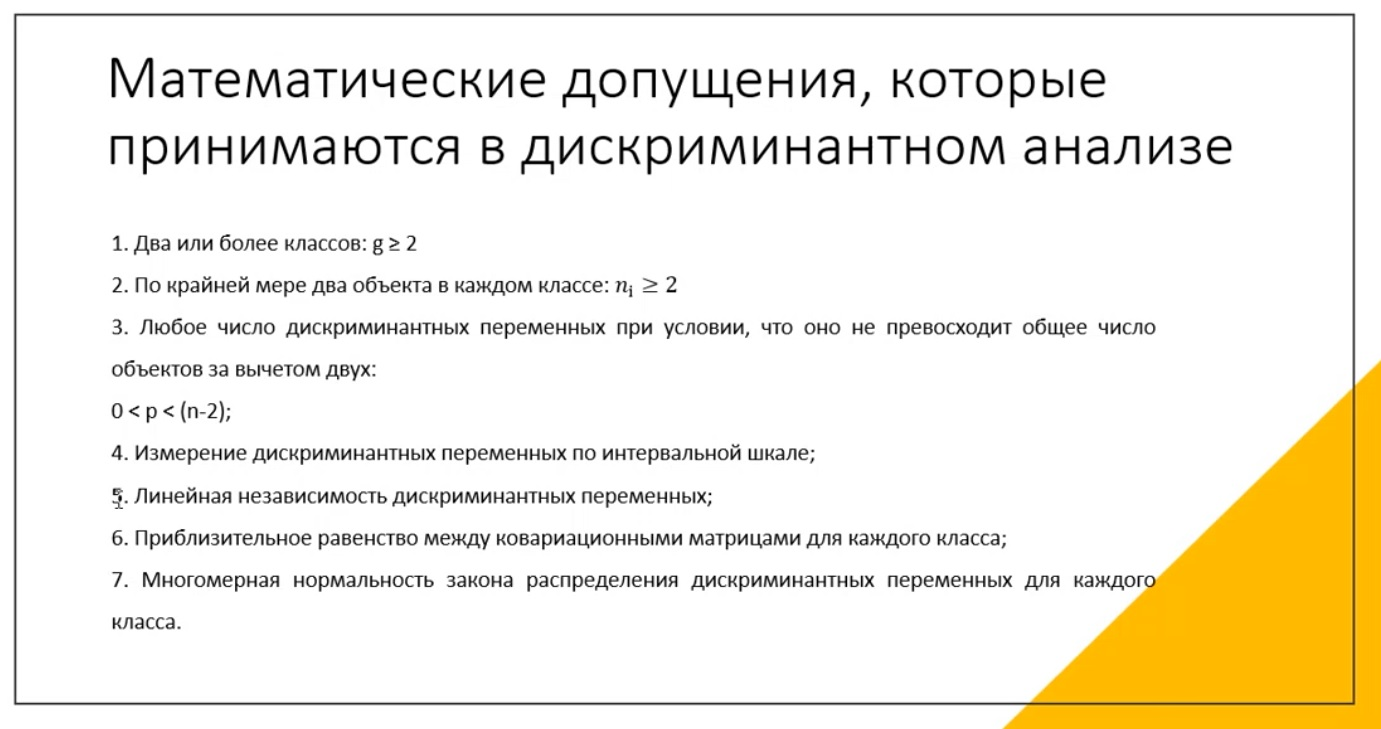

суть дискриминантного метода - снижение размерности

**21. Проверьте многомерную нормальность закона распределения дискриминантных переменных с помощью функции multivariate_normality(X, alpha=.05) из модуля pingouin, который удобно сокращенно называть pg. В функции реализован Henze-Zirkler Multivariate Normality Test. Прокомментируйте результат.**

In [ ]:
pg.multivariate_normality(X, alpha=.05) # распределено ненормально, фигово

HZResults(hz=4.180486027411805, pval=0.0, normal=False)

**22. Проверьте нормальность распределения каждого из признаков из набора данных, воспользовавшись функцией normality(dataframe) из модуля pingouin. В функции реализован тест Шапиро-Уилка. Прокомментируйте результат. Можно ли добиться многомерной нормальности распределения дискриминантных переменных?**


In [ ]:
pg.normality(data) # все признаки ненормальные, фигово

,W,pval,normal
preg,0.904278,1.608089e-21,False
plas,0.970104,1.986761e-11,False
pres,0.818921,1.584007e-28,False
skin,0.904627,1.751576e-21,False
test,0.722021,7.915248e-34,False
mass,0.949989,1.840562e-15,False
pedi,0.836519,2.477697e-27,False
age,0.874766,2.401947e-24,False
class,0.602510,1.292262e-38,False


**23. Проверьте приблизительное равенство между ковариационными матрицами для каждого класса на основе критерия M Бокса, воспользовавшись функцией box_m(dataframe, dvs=['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age'], group='class') из модуля pingouin. Прокомментируйте результат.**

In [ ]:
pg.box_m(data, dvs=['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age'], group='class')
# опять фигово

,Chi2,df,pval,equal_cov
box,226.706491,36.0,1.642145e-29,False


**24. Проверьте линейную независимость дискриминантных переменных на основе коэффициента корреляции Пирсона, воспользовавшись функцией pairwise_corr(dataframe, columns=['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age'], method='pearson') из модуля pingouin. Прокомментируйте результат.**

In [ ]:
# p-unc - это p-value

In [ ]:
pg.pairwise_corr(data, columns=['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age'], method='pearson')

,X,Y,method,alternative,n,r,CI95%,p-unc,BF10,power
0,preg,plas,pearson,two-sided,768,0.129459,"[0.06, 0.2]",3.219491e-04,28.791,0.949814
1,preg,pres,pearson,two-sided,768,0.141282,"[0.07, 0.21]",8.541846e-05,100.059,0.975945
2,preg,skin,pearson,two-sided,768,-0.081672,"[-0.15, -0.01]",2.360795e-02,0.583,0.619944
3,preg,test,pearson,two-sided,768,-0.073535,"[-0.14, -0.0]",4.162094e-02,0.359,0.531407
4,preg,mass,pearson,two-sided,768,0.017683,"[-0.05, 0.09]",6.246376e-01,0.051,0.077839
5,preg,pedi,pearson,two-sided,768,-0.033523,"[-0.1, 0.04]",3.535346e-01,0.069,0.152973
6,preg,age,pearson,two-sided,768,0.544341,"[0.49, 0.59]",1.862813e-60,9.03e+56,1.000000
7,plas,pres,pearson,two-sided,768,0.152590,"[0.08, 0.22]",2.169507e-05,366.214,0.989169
8,plas,skin,pearson,two-sided,768,0.057328,"[-0.01, 0.13]",1.124141e-01,0.159,0.355230
9,plas,test,pearson,two-sided,768,0.331357,"[0.27, 0.39]",3.882624e-21,8.929e+17,1.000000


**26. Несмотря на вывод в п.25, с целью знакомства с возможностями модуля sklearn, постройте модель линейного дискриминантного анализа, воспользовавшись функцией LinearDiscriminantAnalysis() из модуля sklearn.discriminant_analysis. Результат запишите в переменную model.**

**27. Проведите кросс-валидацию, воспользовавшись функцией cross_val_score(model, X, Y, cv=kfold) из модуля sklearn.model_selection. Результат запишите в переменную results.**  

**28. Выведите на экран среднюю долю правильных ответов (accuracy) и стандартное отклонение полученных оценок, воспользовавшись, соответственно, функциями mean() и std().**


In [ ]:
model=LinearDiscriminantAnalysis()

In [ ]:
results=cross_val_score(model, X, Y, cv=kfold)

In [ ]:
results.mean(),results.std()

(0.7669685577580315, 0.04796563054016723)

**29. Обучите модель на всех данных с помощью функции fit().**

**30. По обученной модели дайте прогноз классов для новых наблюдений, заданных в п. 11, воспользовавшись функцией predict().**

In [ ]:
model.fit(X,Y)

LinearDiscriminantAnalysis()

In [ ]:
model.predict(x_new)

array([1., 1.])

**31. По обученной модели дайте прогноз вероятности классов для новых наблюдений, воспользовавшись функцией predict_proba().**

In [ ]:
model.predict_proba(x_new)

array([[0.13996295, 0.86003705],
       [0.10537183, 0.89462817]])

**32. Рассчитайте значения дискриминантных функций, обратившись к функции transform(X). Выведите на экран первые 5 наблюдений.**

In [ ]:
model.transform(X)[0:5] # он сжал 8 признаков к 1 компоненте

array([[ 1.38024702],
       [-1.56452399],
       [ 1.76618515],
       [-1.69058752],
       [ 2.20726804]])

**33. Убедитесь в том, что функция fit_transform(X,Y) дает тот же результат. Выведите на экран первые 5 наблюдений.**


In [ ]:
model.fit_transform(X,Y)[0:5]

array([[ 1.38024702],
       [-1.56452399],
       [ 1.76618515],
       [-1.69058752],
       [ 2.20726804]])

**34. Какому методу прогнозирования Вы доверяете больше? Какой прогноз примете в качестве окончательного?**

In [ ]:
# Логистическая регрессия (функция)